In [5]:
#a1
import pandas as pd
import numpy as np

# Load the Excel file
data = pd.read_excel(r"/content/Lab Session Data.xlsx", sheet_name="Purchase data")

# Extract features (a) and target (b)
a = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
b = data['Payment (Rs)'].to_numpy().reshape(-1, 1)

print(f"a = {a}")
print(f"b = {b}")

# Compute dimensionality
dim_a = a.shape[1]
print("The dimensionality of the vector space is = " + str(dim_a))

# Compute number of vectors
num_vectors_a = a.shape[0]
print("The number of vectors in the vector space is = " + str(num_vectors_a))

# Compute rank of matrix a
rank_a = np.linalg.matrix_rank(a)
print("The rank of the matrix a is = " + str(rank_a))

# Compute pseudo-inverse
a_pseudo_inv = np.linalg.pinv(a)
print("The pseudo-inverse of matrix a is = " + str(a_pseudo_inv))

# Compute cost per product
product_costs = np.dot(a_pseudo_inv, b)
print("The cost of each product available for sale is = " + str(product_costs.flatten()))


a = [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
b = [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
The dimensionality of the vector space is = 3
The number of vectors in the vector space is = 10
The rank of the matrix a is = 3
The pseudo-inverse of matrix a is = [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
The cost of each product available for sale is = [ 1. 55. 18.]


In [6]:
#a2
def predict_cost(a,b):
    """Calculate the model vector X using Pseudo-Inverse."""
    a_pseudo_inv = np.linalg.pinv(a)
    X = a_pseudo_inv @ b
    return X

# Predict the cost of products
X_pred = predict_cost(a,b)
print("\nPredicted Cost of Products:")
print(X_pred)



Predicted Cost of Products:
[[ 1.]
 [55.]
 [18.]]


In [8]:
#a3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data['Customer'] = data['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

X = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]

Y = data['Customer' ]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=42)

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train,Y_train)

prediction = classifier.predict(X_test)

print("Classification Report")

print(classification_report(Y_test,prediction))

Classification Report
              precision    recall  f1-score   support

        POOR       0.00      0.00      0.00         2
        RICH       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Mean of Stock Price: 1560.66
Variance of Stock Price: 58732.37

Sample Mean (Wednesdays): 1550.71
Difference from Population Mean: 9.96

Sample Mean (April): 1698.95
Difference from Population Mean: 138.29

Probability of Making a Loss: 49.80%

Probability of Making a Profit on Wednesday: 42.00%

Conditional Probability of Profit given it's Wednesday: 209.16%


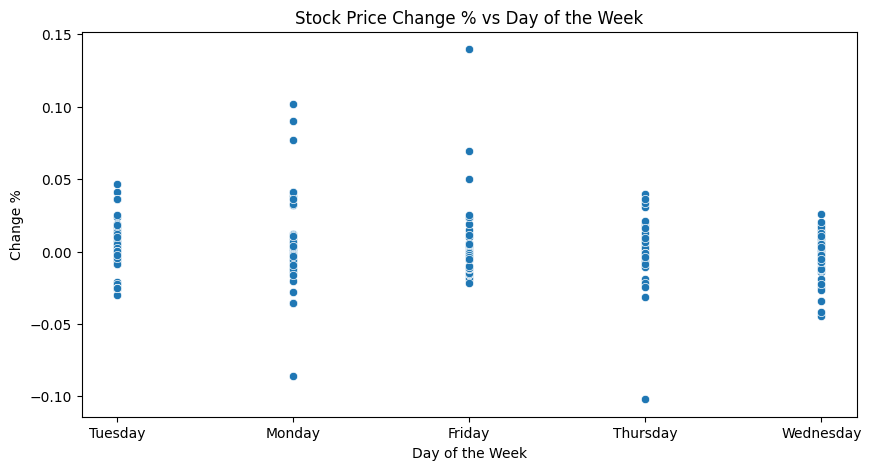

In [9]:
#a4
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Load IRCTC Stock Price data
stock_data= pd.read_excel(r"/content/Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")
# Extract relevant columns
price_data = stock_data.iloc[:, 3]  # Column D: Price
chg_percent = stock_data.iloc[:, 8]  # Column I: Chg%
dates = stock_data.iloc[:, 0]  # Column A: Dates

# Convert dates to pandas datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Day'] = stock_data['Date'].dt.day_name()

# 1. Calculate Mean & Variance
mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print(f"\nMean of Stock Price: {mean_price:.2f}")
print(f"Variance of Stock Price: {variance_price:.2f}")

# 2. Calculate mean for Wednesdays
wednesday_data = stock_data[stock_data['Day'] == "Wednesday"]
mean_wed_price = statistics.mean(wednesday_data.iloc[:, 3])

print(f"\nSample Mean (Wednesdays): {mean_wed_price:.2f}")
print(f"Difference from Population Mean: {abs(mean_price - mean_wed_price):.2f}")

# 3. Calculate mean for April
april_data = stock_data[stock_data['Date'].dt.month == 4]
mean_april_price = statistics.mean(april_data.iloc[:, 3])

print(f"\nSample Mean (April): {mean_april_price:.2f}")
print(f"Difference from Population Mean: {abs(mean_price - mean_april_price):.2f}")

# 4. Probability of making a loss
prob_loss = sum(chg_percent < 0) / len(chg_percent)
print(f"\nProbability of Making a Loss: {prob_loss:.2%}")

# 5. Probability of making a profit on Wednesday
prob_profit_wed = sum((chg_percent > 0) & (stock_data['Day'] == "Wednesday")) / sum(stock_data['Day'] == "Wednesday")
print(f"\nProbability of Making a Profit on Wednesday: {prob_profit_wed:.2%}")

# 6. Conditional Probability P(Profit | Wednesday)
prob_wed = sum(stock_data['Day'] == "Wednesday") / len(stock_data)
prob_conditional_profit = prob_profit_wed / prob_wed
print(f"\nConditional Probability of Profit given it's Wednesday: {prob_conditional_profit:.2%}")

# 7. Scatter plot of % change vs. day of week
plt.figure(figsize=(10, 5))
sns.scatterplot(x=stock_data['Day'], y=chg_percent)
plt.xlabel("Day of the Week")
plt.ylabel("Change %")
plt.title("Stock Price Change % vs Day of the Week")
plt.show()


   Record ID  age  sex  on thyroxine  query on thyroxine  \
0  840801013   29    1             0                   0   
1  840801014   29    1             0                   0   
2  840801042   41    1             0                   0   
3  840803046   36    1             0                   0   
4  840803047   32    1             0                   0   

   on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  \
0                          0     0         0                0               0   
1                          0     0         0                0               0   
2                          0     0         0                0               0   
3                          0     0         0                0               0   
4                          0     0         0                0               0   

   ...  TT4 measured  TT4  T4U measured  T4U  FTI measured  FTI  TBG measured  \
0  ...             f    ?             f    ?             f    ?        

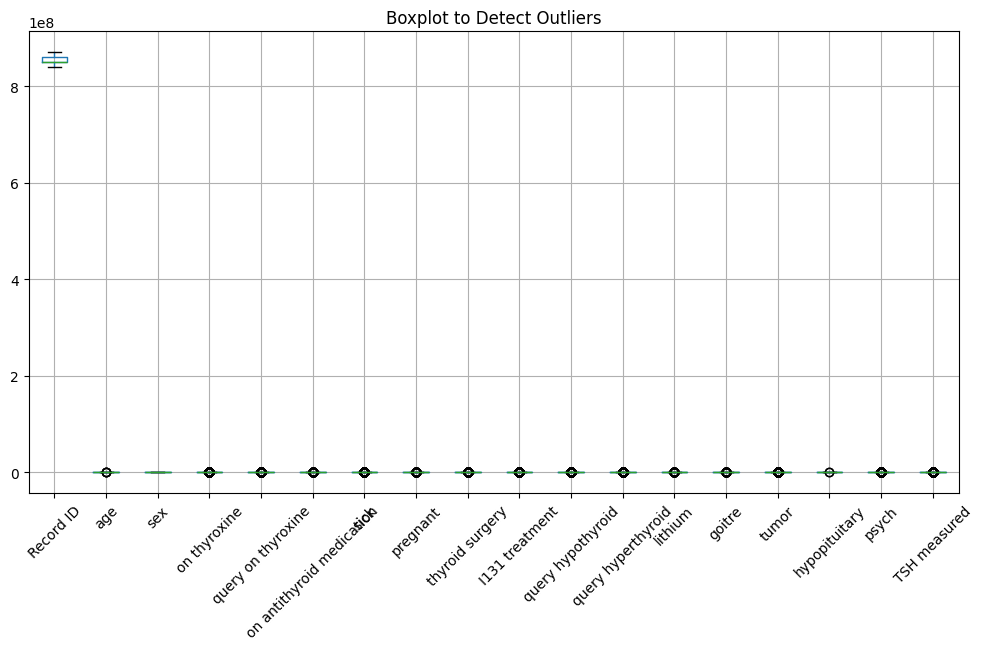


Mean of Numeric Variables:
 Record ID                    8.529473e+08
age                          7.355582e+01
sex                          1.270933e+00
on thyroxine                 1.351941e-01
query on thyroxine           1.668120e-02
on antithyroid medication    1.264719e-02
sick                         3.750545e-02
pregnant                     1.166594e-02
thyroid surgery              1.460968e-02
I131 treatment               1.842564e-02
query hypothyroid            6.868731e-02
query hyperthyroid           7.097689e-02
lithium                      1.013956e-02
goitre                       9.158308e-03
tumor                        2.627562e-02
hypopituitary                2.180549e-04
psych                        4.557348e-02
TSH measured                 9.081989e-01
dtype: float64

Standard Deviation of Numeric Variables:
 Record ID                    7.581969e+06
age                          1.183977e+03
sex                          5.142958e-01
on thyroxine                 3.

In [11]:
#a5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

file = pd.read_excel(r"/content/Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")

print(thyroid_data.head())

print("\nData Types of Each Column:\n", thyroid_data.dtypes)

categorical_cols = thyroid_data.select_dtypes(include=["object"]).columns

print("\nCategorical Columns:\n", categorical_cols)

numeric_cols = thyroid_data.select_dtypes(include=["int64", "float64"]).columns

print("\nRange of Numeric Variables:\n", thyroid_data[numeric_cols].describe().loc[["min", "max"]])

missing_values = thyroid_data.isnull().sum()

print("\nMissing Values in Each Attribute:\n", missing_values)


plt.figure(figsize=(12, 6))
thyroid_data[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()

mean_values = thyroid_data[numeric_cols].mean()
std_values = thyroid_data[numeric_cols].std()

print("\nMean of Numeric Variables:\n", mean_values)
print("\nStandard Deviation of Numeric Variables:\n", std_values)


In [13]:
#a6
for col in numeric_cols:
    if thyroid_data[col].isnull().sum() > 0:
        if thyroid_data[col].skew() > 1:  # Check for outliers
            thyroid_data[col].fillna(thyroid_data[col].median(), inplace=True)
        else:
            thyroid_data[col].fillna(thyroid_data[col].mean(), inplace=True)

for col in categorical_cols:
    thyroid_data[col].fillna(thyroid_data[col].mode()[0], inplace=True)

print("\nMissing Values after Imputation:")
print(thyroid_data.isnull().sum())



Missing Values after Imputation:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

<ipython-input-13-ee1dfaa14329>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  thyroid_data[col].fillna(thyroid_data[col].mode()[0], inplace=True)


In [14]:
#a7
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Identify attributes that need normalization
scaler = MinMaxScaler()
thyroid_data[numeric_cols] = scaler.fit_transform(thyroid_data[numeric_cols])

print("\nNormalized Data Sample:")
print(thyroid_data.head())



Normalized Data Sample:
      Record ID       age  sex  on thyroxine  query on thyroxine  \
0  0.000000e+00  0.000427  0.5           0.0                 0.0   
1  3.410871e-08  0.000427  0.5           0.0                 0.0   
2  9.891527e-07  0.000610  0.5           0.0                 0.0   
3  6.934301e-05  0.000534  0.5           0.0                 0.0   
4  6.937712e-05  0.000473  0.5           0.0                 0.0   

   on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  \
0                        0.0   0.0       0.0              0.0             0.0   
1                        0.0   0.0       0.0              0.0             0.0   
2                        0.0   0.0       0.0              0.0             0.0   
3                        0.0   0.0       0.0              0.0             0.0   
4                        0.0   0.0       0.0              0.0             0.0   

   ...  TT4 measured  TT4  T4U measured  T4U  FTI measured  FTI  TBG measured  

In [15]:
#a8
def jaccard_similarity(vec1, vec2):
    f11 = sum((vec1 == 1) & (vec2 == 1))
    f01 = sum((vec1 == 0) & (vec2 == 1))
    f10 = sum((vec1 == 1) & (vec2 == 0))
    return f11 / (f11 + f01 + f10)

def simple_matching_coefficient(vec1, vec2):
    f11 = sum((vec1 == 1) & (vec2 == 1))
    f00 = sum((vec1 == 0) & (vec2 == 0))
    f01 = sum((vec1 == 0) & (vec2 == 1))
    f10 = sum((vec1 == 1) & (vec2 == 0))
    return (f11 + f00) / (f00 + f01 + f10 + f11)

# Take first two binary attribute vectors
binary_columns = [col for col in numeric_cols if thyroid_data[col].nunique() == 2]
vec1, vec2 = thyroid_data[binary_columns].iloc[0], thyroid_data[binary_columns].iloc[1]

jc = jaccard_similarity(vec1, vec2)
smc = simple_matching_coefficient(vec1, vec2)

print(f"\nJaccard Coefficient: {jc:.4f}")
print(f"Simple Matching Coefficient: {smc:.4f}")



Jaccard Coefficient: 0.5000
Simple Matching Coefficient: 0.9333


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
first_two_vectors = thyroid_data.iloc[:2]  # Select first two rows

numeric_data = first_two_vectors.select_dtypes(include=["int64", "float64"])

vector_1 = numeric_data.iloc[0].values.reshape(1, -1)
vector_2 = numeric_data.iloc[1].values.reshape(1, -1)

cosine_sim = cosine_similarity(vector_1, vector_2)[0][0]

print(f"\nCosine Similarity: {cosine_sim:.4f}")



Cosine Similarity: 0.7454


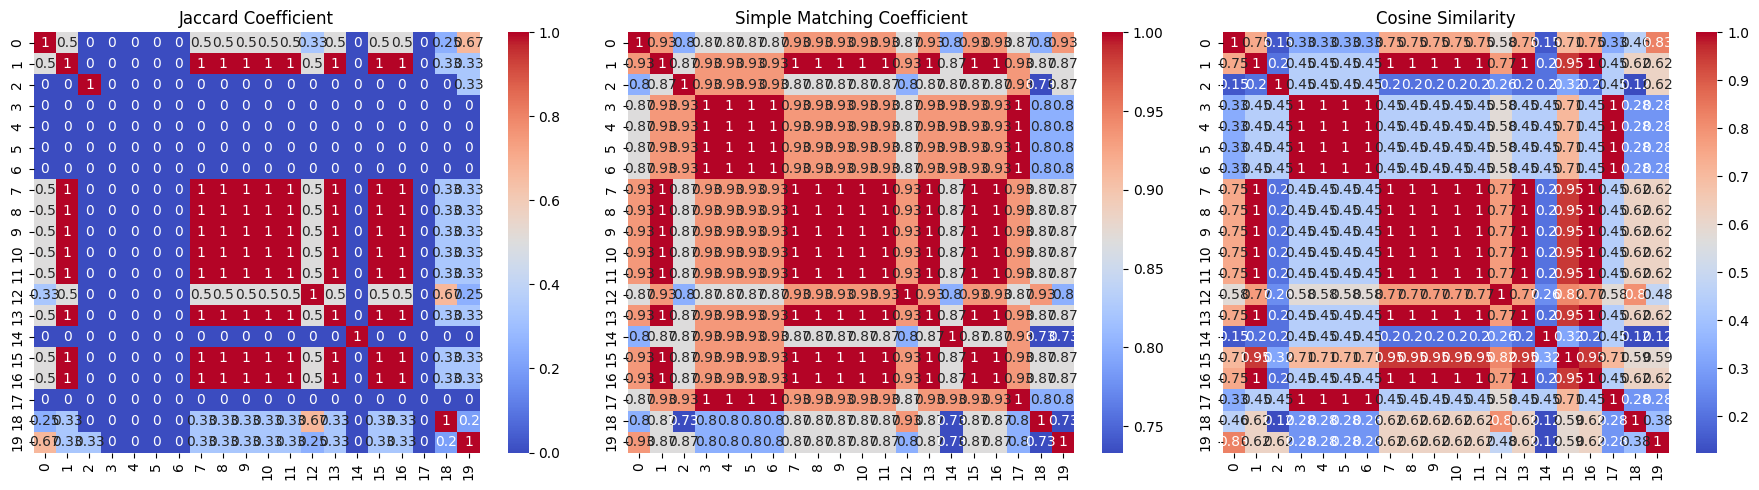

In [21]:
import seaborn as sns
first_20_vectors = thyroid_data.iloc[:20]

binary_cols = [
  col
  for col in thyroid_data.columns
  if thyroid_data[col].dropna().apply(lambda x: x in (0, 1, 0.0, 1.0)).all()
  and thyroid_data[col].dropna().nunique() <= 2 # Check for at most 2 unique values
  and pd.api.types.is_numeric_dtype(thyroid_data[col]) # Check if the column is numeric
]
binary_data = first_20_vectors[binary_cols]
binary_matrix = binary_data.to_numpy()
numeric_data = first_20_vectors.select_dtypes(include=["int64", "float64"]).to_numpy()
def calculate_jc_smc(matrix):
  """Calculate Jaccard and SMC similarity matrices."""
  n = matrix.shape[0]
  jc_matrix = np.zeros((n, n))
  smc_matrix = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      f11 = np.sum((matrix[i] == 1) & (matrix[j] == 1))
      f00 = np.sum((matrix[i] == 0) & (matrix[j] == 0))
      f10 = np.sum((matrix[i] == 1) & (matrix[j] == 0))
      f01 = np.sum((matrix[i] == 0) & (matrix[j] == 1))
      jc_matrix[i, j] = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
      smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0
  return jc_matrix, smc_matrix
jc_matrix, smc_matrix = calculate_jc_smc(binary_matrix)
cos_matrix = cosine_similarity(numeric_data)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(jc_matrix, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Jaccard Coefficient")
sns.heatmap(smc_matrix, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Simple Matching Coefficient")
sns.heatmap(cos_matrix, annot=True, cmap="coolwarm", ax=axes[2])
axes[2].set_title("Cosine Similarity")
plt.tight_layout()
plt.show()